# Package

This shows how to create a package and install it locally.

In [1]:
#uv add "shirin @ git+https://github.com/SDPSDPSDPSDPSDPSDP/data-analysis.git" --frozen

# Fake Dataset

Collapse this part.

In [2]:
from assets.fake_data import df, df_documents_by_year

# Examples

This shows how to import the package and use the modules.

## Plotting

In [3]:
from shirin.plot import PlotGraphs, Colors
plot = PlotGraphs(export=False, format='png')

In [4]:
import pandas as pd
pd.options.display.max_rows = 100
# pd.options.display.max_cols = 100

### Countplot

#### Y

Countplot Y


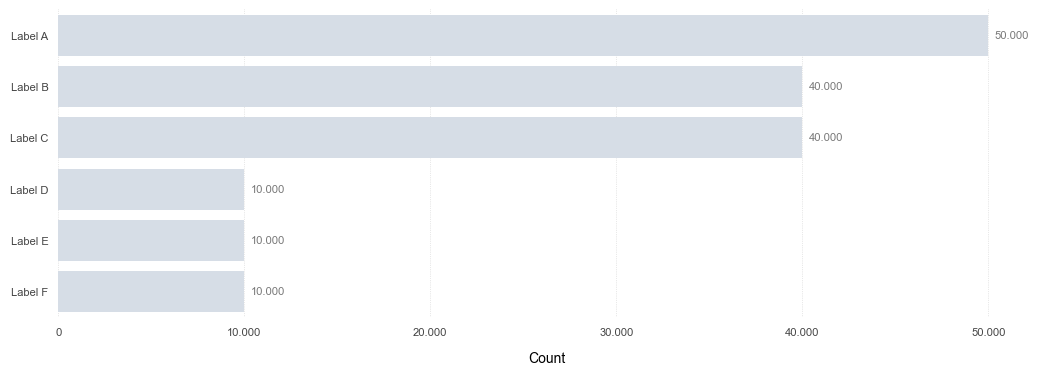

In [5]:
print("Countplot Y")
plot.countplot_y(df, "label")

Stacked Countplot Y with Hue


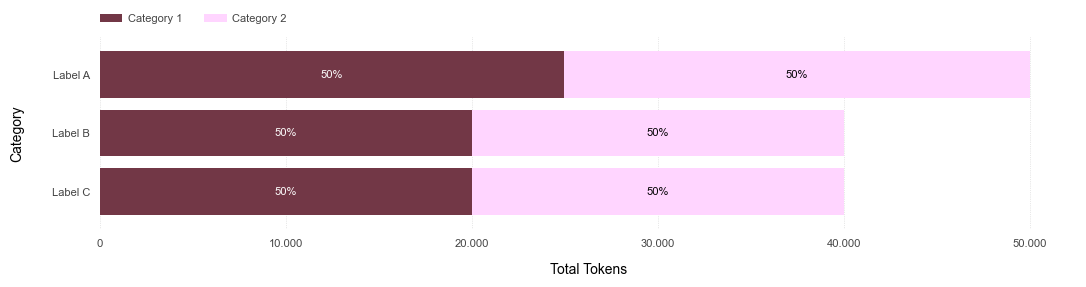

In [6]:
print("Stacked Countplot Y with Hue")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_y(
    df, "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=3, 
    ylabel="Category", 
    xlabel="Total Tokens",
    stacked=True, 
    stacked_labels='standard',
    order_type='alphabetical',
)

Normalized Countplot Y


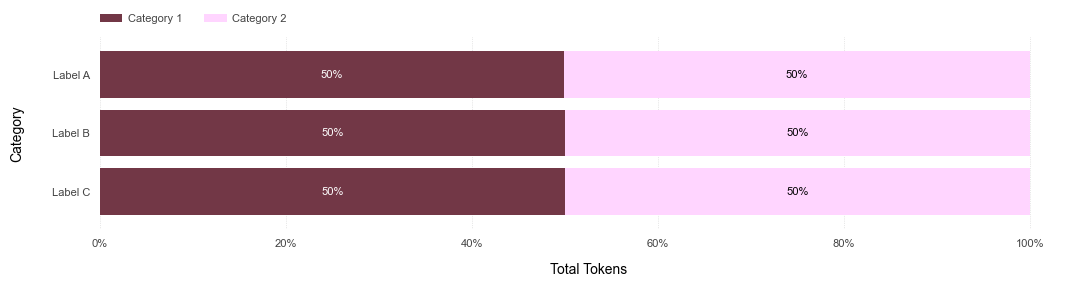

In [7]:
print("Normalized Countplot Y")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_y(
    df, 
    "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=3, 
    ylabel="Category", 
    xlabel="Total Tokens",
    order_type='alphabetical',
    normalized=True
)

#### X

Countplot X


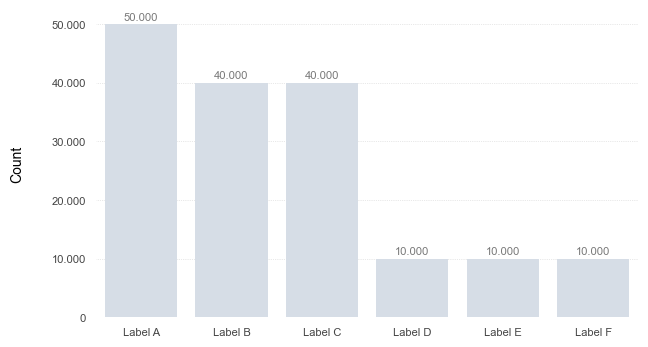

In [8]:
print("Countplot X")
plot.countplot_x(df, "label")

Stacked Countplot X with Hue


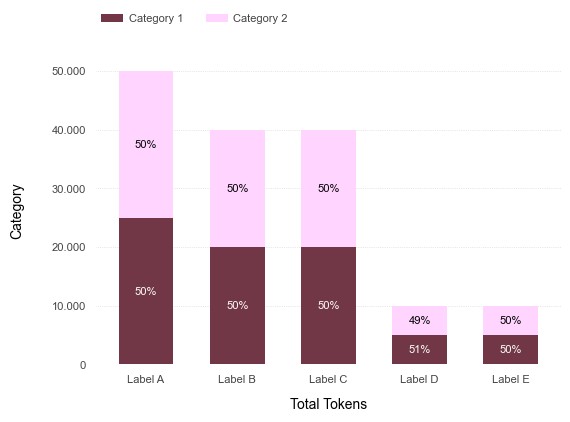

In [9]:
print("Stacked Countplot X with Hue")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_x(
    df, "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=5, 
    ylabel="Category", 
    xlabel="Total Tokens",
    stacked=True, 
    stacked_labels='standard',
    order_type='alphabetical',
)

Normalized Countplot X


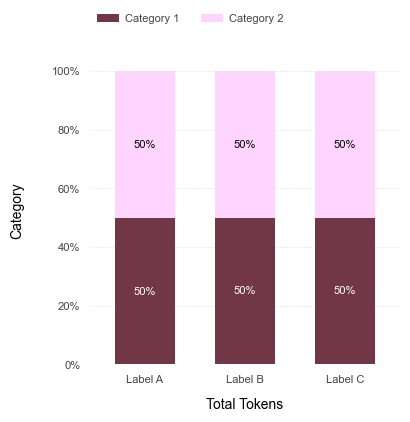

In [10]:
print("Normalized Countplot X")
palette={"category_1": Colors.BROWN, "category_2": Colors.PINK}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.countplot_x(
    df, 
    "label", 
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.17,
    top_n=3, 
    ylabel="Category", 
    xlabel="Total Tokens",
    order_type='alphabetical',
    normalized=True,
)

### Barplot

#### Y

Barplot Y


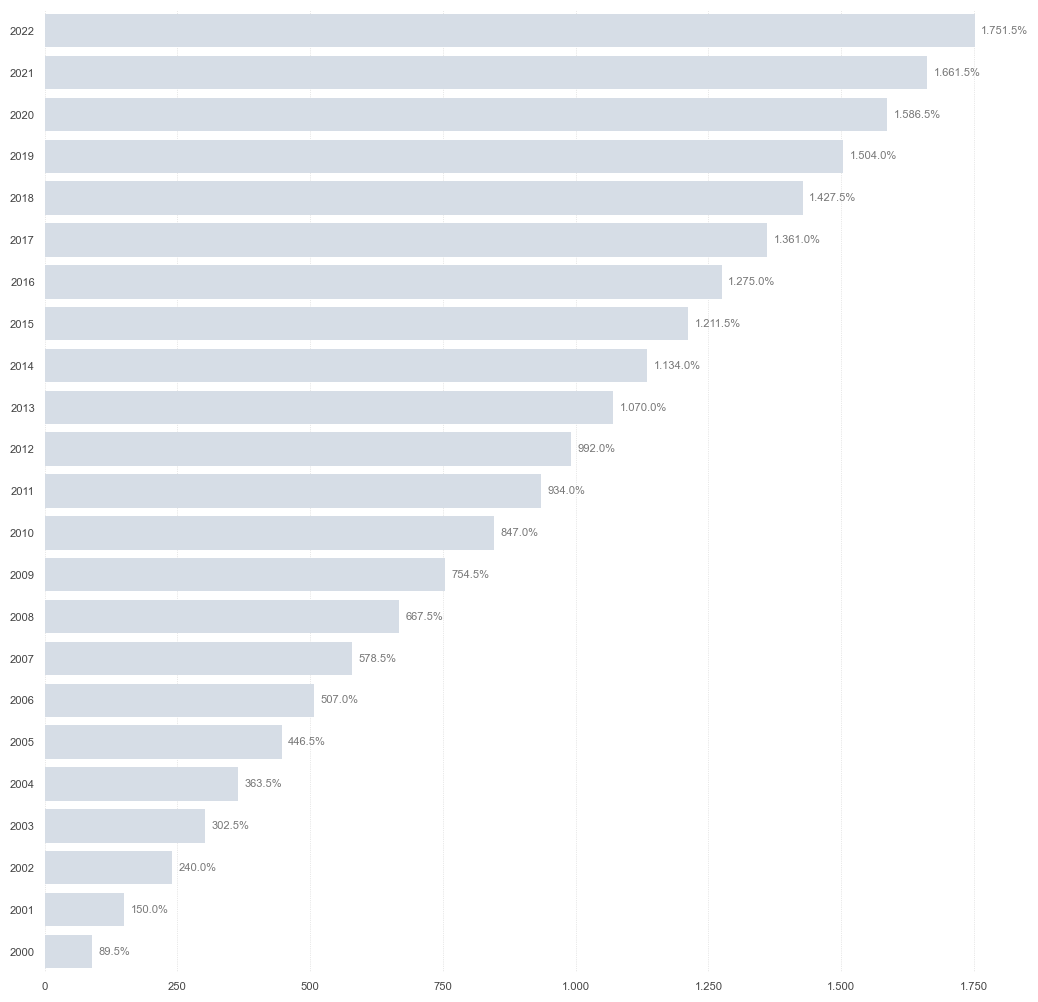

In [11]:
print("Barplot Y")
plot.barplot_y(
    df_documents_by_year, 
    y='year', 
    value="cumul_total_docs",
    percentage_labels=True,
)

#### X

Barplot X


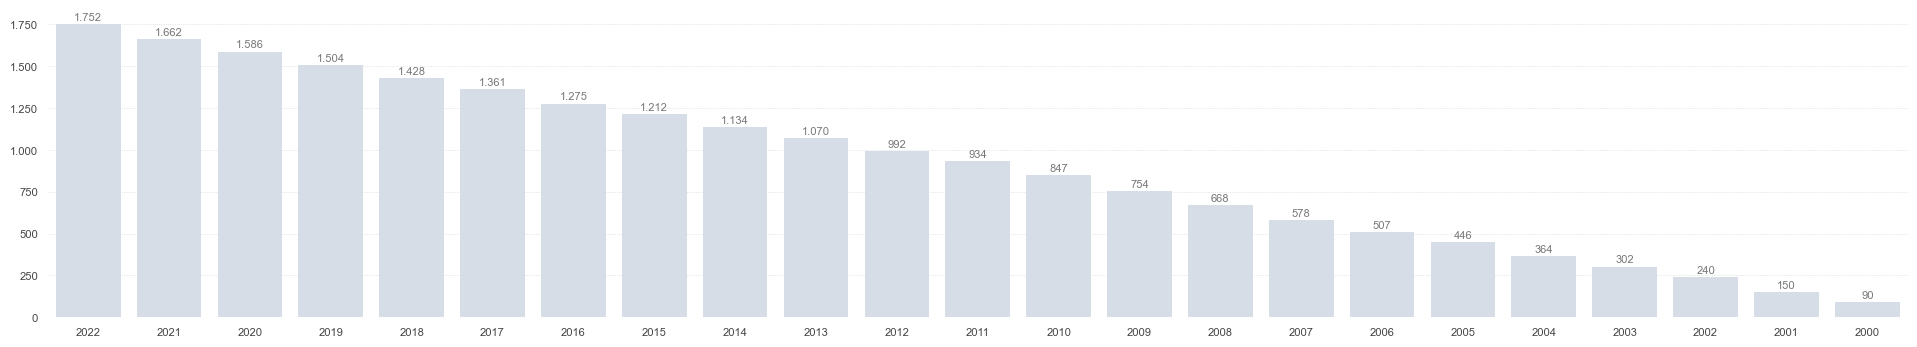

In [12]:
print("Barplot X")
plot.barplot_x(
    df_documents_by_year, 
    x='year', 
    value="cumul_total_docs"
)

Barplot X with Hue


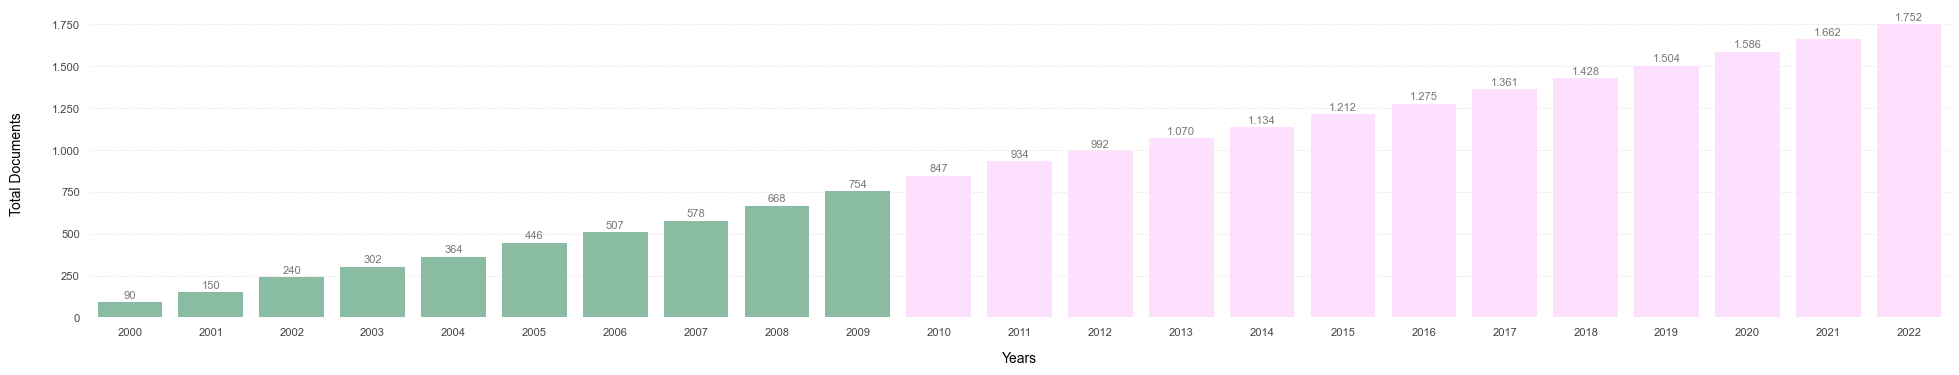

In [13]:
print("Barplot X with Hue")
palette={True: Colors.GOOD_DARK_GREEN, False: Colors.BAD_PINK}
label_map={True: "Good", False: "Bad"}
plot.barplot_x(
    df_documents_by_year, 
    x="year", 
    value="cumul_total_docs",
    hue="hue", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=False, 
    ncol=2, 
    legend_offset=0.99,
    ylabel="Total Documents", 
    xlabel="Years",
    stacked=False, 
    stacked_labels=None,
    order_type='alphabetical',
)

### Histogram

Histogram


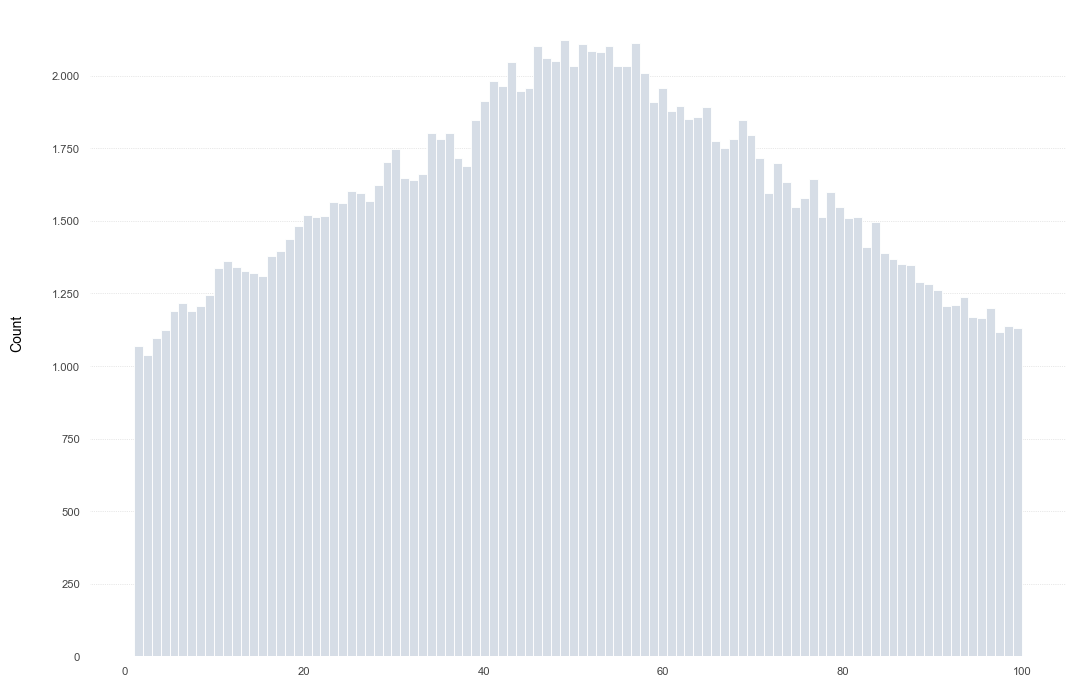

In [14]:
print("Histogram")
plot.histogram(df, "values")

Histogram


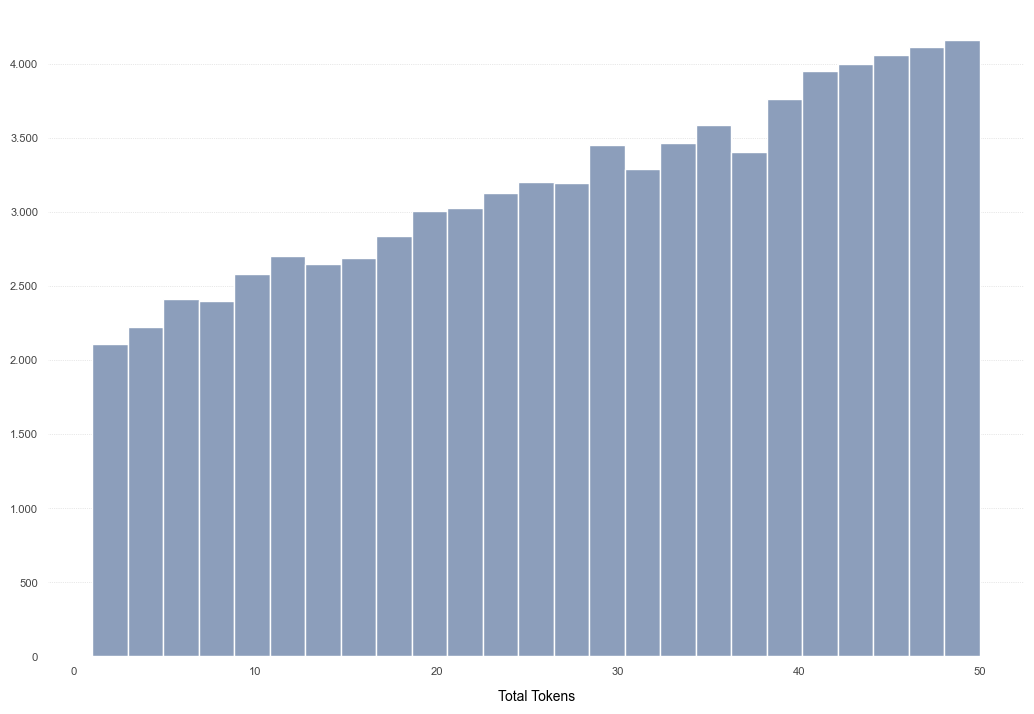

In [15]:
print("Histogram")
plot.histogram(
    df, 
    "values", 
    palette=Colors.DARK_BLUE, 
    xlimit=50, 
    bins=25, 
    xlabel="Total Tokens", 
    ylabel=""
)

Histogram with different Categories


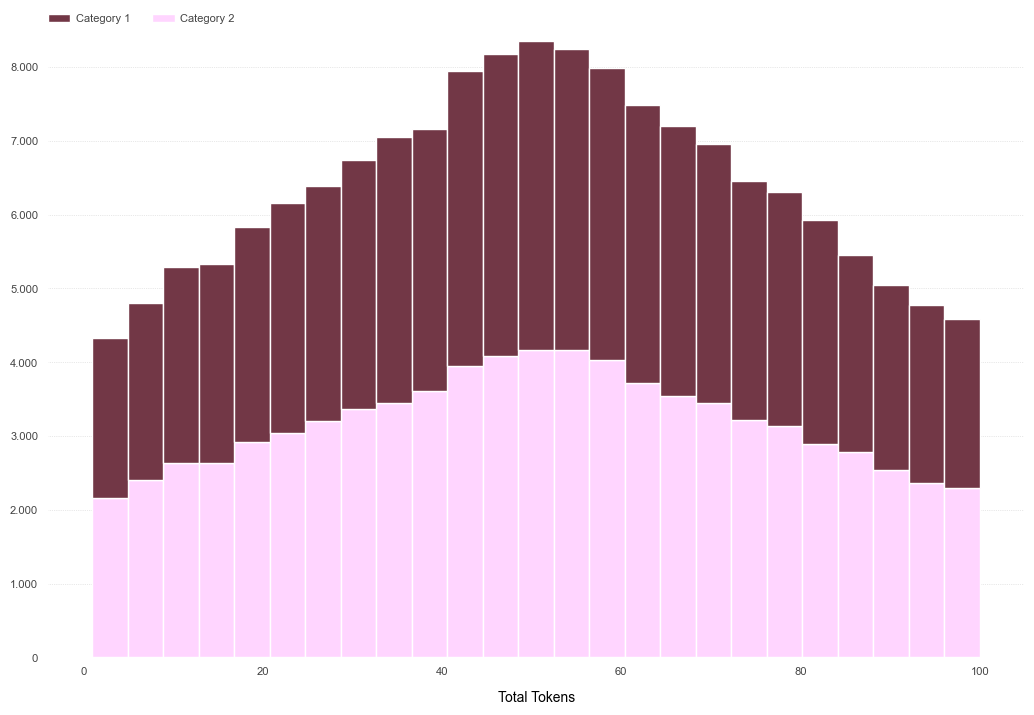

In [16]:
print("Histogram with different Categories")
palette={True: Colors.BROWN, False: Colors.PINK}
label_map={True: "Category 1", False: "Category 2"}
plot.histogram(
    df, 
    "values", 
    xlimit=100, 
    bins=25, 
    xlabel="Total Tokens", 
    ylabel="",
    hue="hue2", 
    palette=palette, 
    label_map=label_map, 
    plot_legend=True, 
    ncol=2, 
    legend_offset=1.01, 
    stacked=True
)

### Pie

#### Basic Pie Plot

Basic Pie


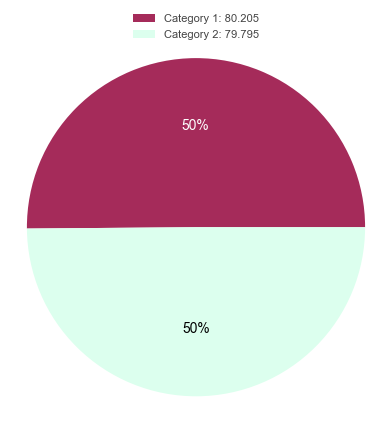

In [17]:
print("Basic Pie")
palette={"category_1": Colors.BAD_RED, "category_2": Colors.GOOD_GREEN}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.pie(
    df, 
    "hue", 
    palette=palette, 
    label_map=label_map, 
    n_after_comma = 0,
    value_datalabel = 5,
    donut=False
)

Basic Donut


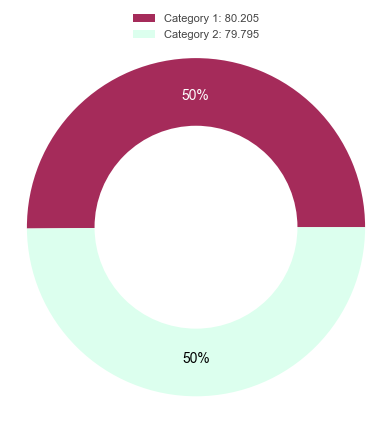

In [18]:
print("Basic Donut")
palette={"category_1": Colors.BAD_RED, "category_2": Colors.GOOD_GREEN}
label_map={"category_1": "Category 1", "category_2": "Category 2"}
plot.pie(
    df, 
    "hue", 
    palette=palette, 
    label_map=label_map, 
    n_after_comma = 0,
    value_datalabel = 5,
    donut=True
)

## Lineplot

Lineplot


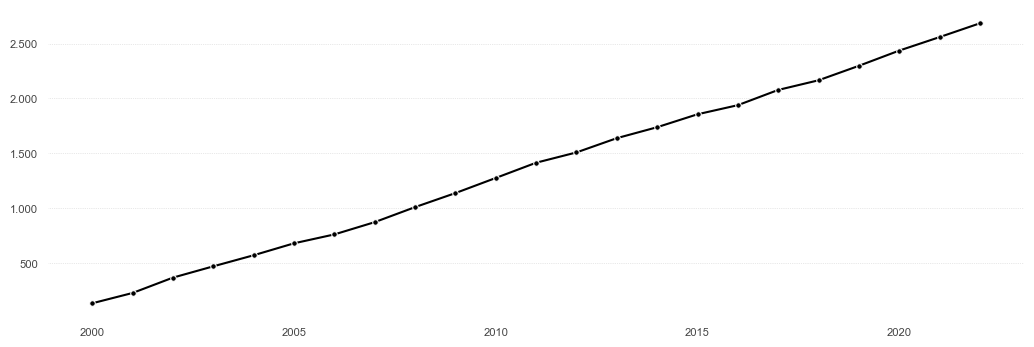

In [19]:
print('Lineplot')
plot.lineplot(df=df_documents_by_year.drop_duplicates(subset='year'), x='year', y='cumul_total_docs')

Lineplot with Hue


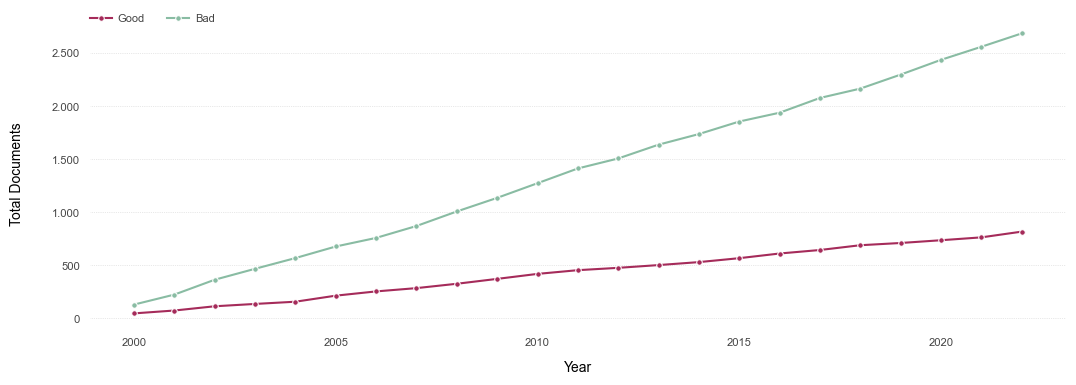

In [20]:
print("Lineplot with Hue")
plot.lineplot(
    df_documents_by_year, 
    x='year', 
    y='cumul_total_docs', 
    hue='type',
    palette={True: Colors.GOOD_DARK_GREEN, False: Colors.BAD_RED},
    label_map={True: "Good", False: "Bad"},
    plot_legend=True,
    ncol=2,
    legend_offset=1.05,
    xlabel='Year', 
    ylabel='Total Documents',
    rotation=0, 
    fill_missing_values='zero',
)

## Statistics

In [21]:
import shirin.stats

In [22]:
df['values'].stats()

Mean: 51
Median: 51
Minimum: 1
Maximum: 100
